In [18]:
import pandas as pd
import mysql.connector as sql
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\13906\AppData\Local\Temp\ipykernel_37068\1970504720.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\13906\AppData\Local\Temp\ipykernel_37068\1970504720.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\13906\AppData\Local\Temp\ipykernel_37068\1970504720.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\13906\AppData\Local\Temp\ipykernel_37068\1970504720.py:19: UserWarning: pandas only supports S

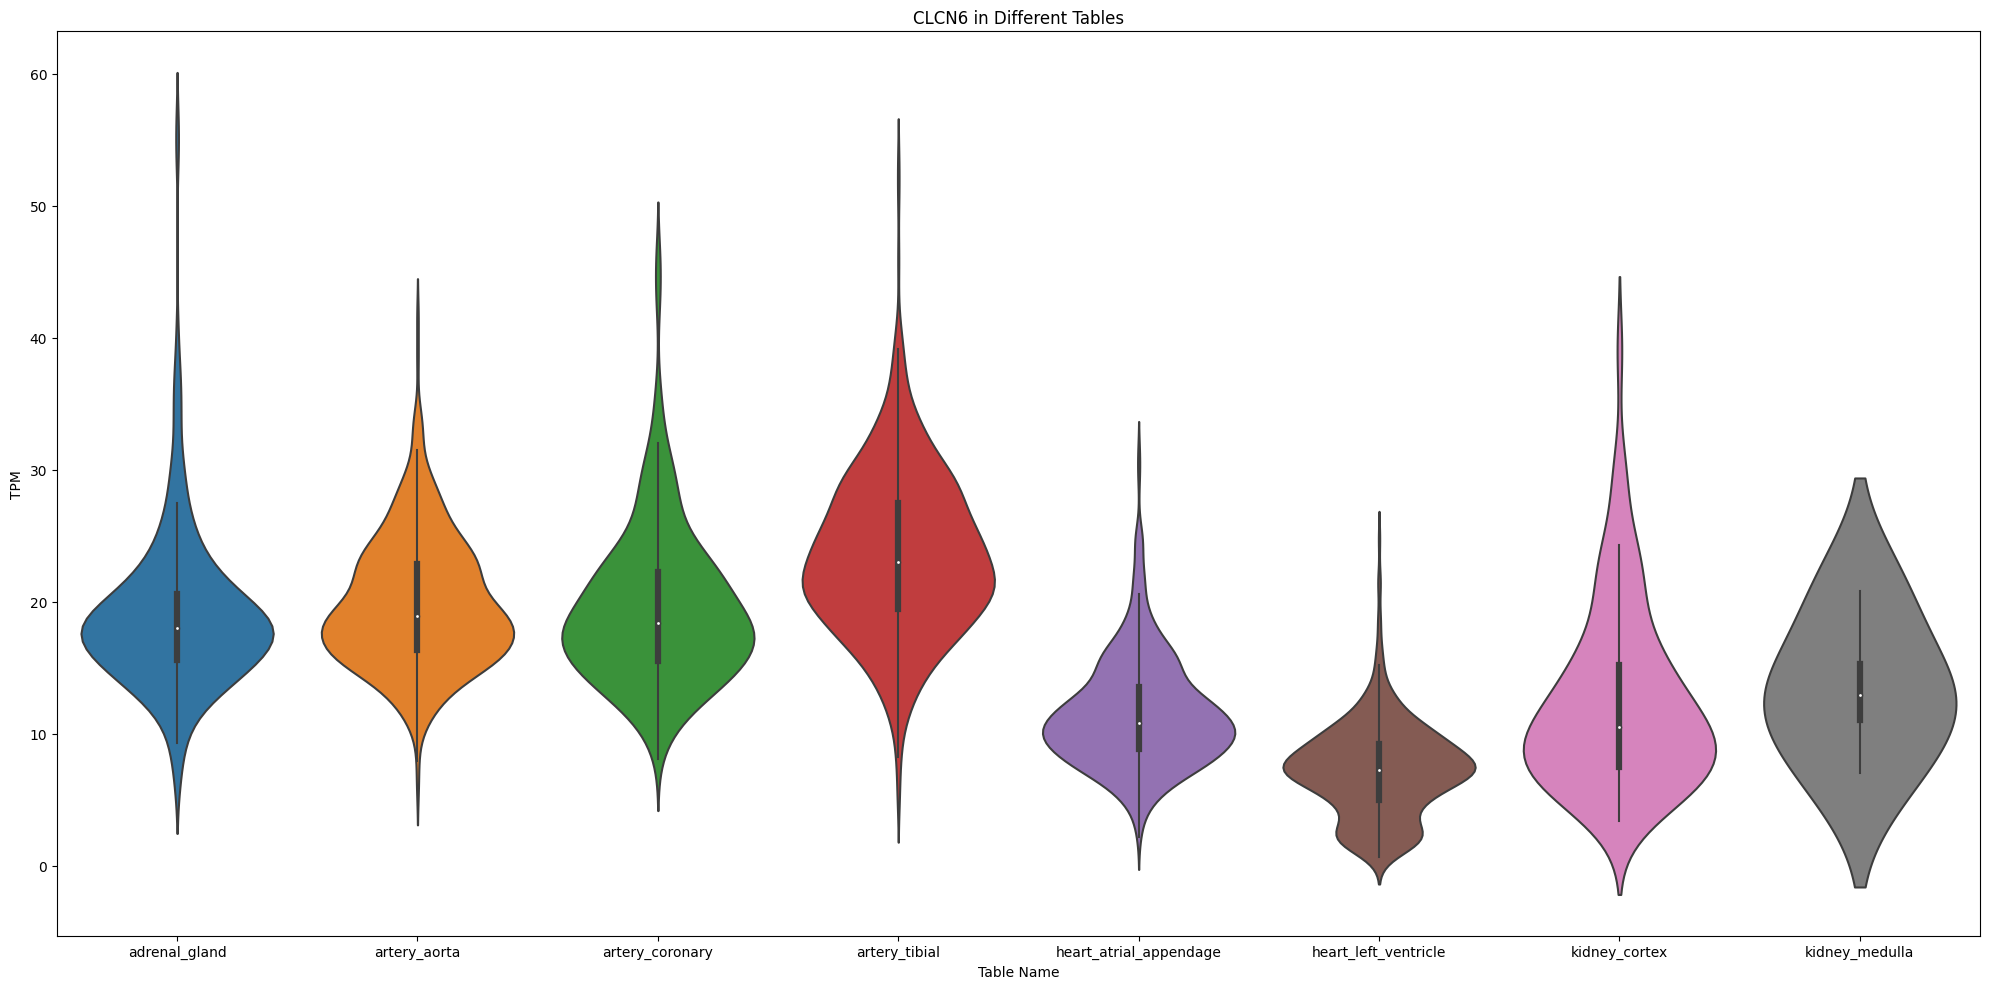

In [35]:
# Connect to database
# Database config:
config = {
    'user': 'root',
    'password': 'zzj1998310',
    'host': 'localhost',
    'database': 'capstone_graph_4',
}

# Connect to database
db = sql.connect(**config)
cursor = db.cursor()

# Tables
query1 = "SELECT table_name FROM information_schema.tables WHERE table_schema = %s"
cursor.execute(query1, (config['database'],))
tables = [row[0] for row in cursor]

# Create graphs
plt.figure(figsize=(20, 10))

# Violin plot
all_data = []
positions = []
for i, table in enumerate(tables):
    # Query
    query = f"SELECT TPM FROM {table} WHERE description = 'CLCN6'"
    df = pd.read_sql(query, db)
    if not df.empty:
        all_data.append(df['TPM'])
        positions.append(i)

# Plot
sns.violinplot(data=all_data, positions=positions, scale='width')
plt.xticks(positions, tables)
plt.xlabel('Table Name')
plt.ylabel('TPM')
plt.title("CLCN6 in Different Tables")
plt.tight_layout()
plt.show()

# Close connection
cursor.close()
db.close()